# ModelArts 图像处理体验

目前机器学习领域，针对图像识别共有两种应用实例，分别是图片分类（识别图片中是否包含某个物体）和物体识别（识别图片中每个物体的类别和位置）。相关的机器学习算法有很多，比如用于图片分类的VGG、ResNet、ResNet+FPN、MobileNet，用于物体识别的Yolo，Faster R-CNN，Mask R-CNN等。
如果对相关算法不够熟悉，又不希望陷入繁琐的标注和调优，推荐使用华为云的ModelArts AI开发平台，其图像分类、物体检测、预测分析、声音分类等自动学习功能，甚至能够做到全程不用输入代码。在模型库中还能接触到其他学员们搞出来的有趣模型。

对于AI的初学者来说，ModelArts能够让人在被繁琐的代码和语法淹没之前，就可以先享受到简单的应用，而且准确度还真不低。不过，用于机器学习的数据还是要自己准备好的，当然，如果能对数据进行预处理，学习效率和效果很可能会更高。下面，就介绍一下对于图片分类和物体识别十分重要的图像处理：

时下OpenCV是最为流行的开源计算机视觉库，目前已全面支持Python3.7。在管理员模式下启动CMD，使用如下命令即可安装：

pip install opencv-python

如直连美帝服务器实在太慢，可以指定清华镜像：

pip install opencv-python  -i https://pypi.tuna.tsinghua.edu.cn/simple

# 一、加载图片

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

OpenCV在导入时就是cv2，就在几个月前才开始支持Python3.7，实属不易，用于处理图像。numpy用于处理数组和矩阵。matplotlib用于展示结果。跑一下代码，如果有报错，更新或重新安装一下这几个库即可。

献礼新中国成立70周年，以图片（文件名“001.jpg”）为例：

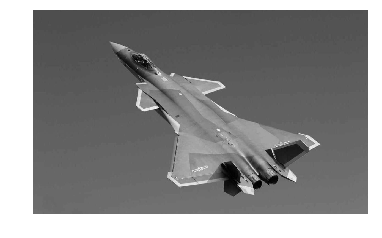

In [2]:
image = cv2.imread("001.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

cv2库读取图片的函数是imread，第一个参数是图片的路径，第二个参数是读取的方式，比如IMREAD_GRAYSCALE 就是以灰度方式读取，将001.jpg读取到了image变量中。调用matplotlib库，以灰度方式展示。

In [3]:
type(image)
# 数据类型

numpy.ndarray

type函数展示image的数据类型，是数组，可以使用numpy库来进行各种加工和运算。

In [4]:
image

array([[ 78,  78,  78, ...,  81,  81,  81],
       [ 78,  78,  78, ...,  81,  81,  81],
       [ 78,  78,  78, ...,  81,  81,  81],
       ...,
       [111, 111, 111, ..., 118, 118, 118],
       [111, 111, 111, ..., 118, 118, 118],
       [111, 111, 111, ..., 118, 118, 118]], dtype=uint8)

In [5]:
image.shape

(740, 1218)

输出image变量，可以看到是一个二维数组（也可以叫矩阵）。矩阵中每个方括号是一列，每列中的每个元素与图片上的像素一一对应，数值表示为灰度值，在0(黑色)-255(白色)之间变动。

In [6]:
image[0,0]
#矩阵中每个元素的值表示灰度

78

输出第一行第一列的像素，值为78，代表了灰度。

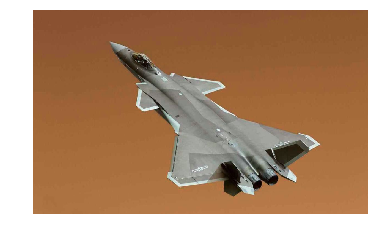

In [7]:
image_col = cv2.imread("001.jpg",cv2.IMREAD_COLOR)
plt.imshow(image_col), plt.axis("off")
plt.show()

以彩色方式导入001.jpg图片，发现颜色与原图有所不同。因为彩色在电脑屏幕上显示的原理是蓝色、绿色和红色的组合（BGR），而许多图像的展示程序，包括matplotlib，将红色和蓝色对调了位置，因此，务必注意在机器学习中，记得作如下转换：

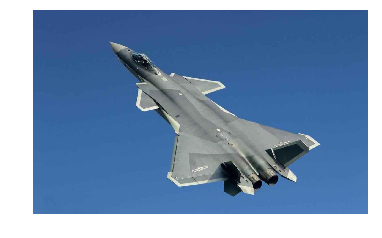

In [8]:
image_rgb = cv2.cvtColor(image_col, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

cvtColor函数接收两个参数，分别是待转换图片变量名和转换方式，使用BGR to RGB，一切都正常了。

In [9]:
image_rgb

array([[[ 49,  81, 138],
        [ 49,  81, 138],
        [ 49,  81, 138],
        ...,
        [ 52,  84, 141],
        [ 52,  84, 141],
        [ 52,  84, 141]],

       [[ 49,  81, 138],
        [ 49,  81, 138],
        [ 49,  81, 138],
        ...,
        [ 50,  85, 141],
        [ 52,  84, 141],
        [ 50,  85, 141]],

       [[ 49,  81, 138],
        [ 49,  81, 138],
        [ 49,  81, 138],
        ...,
        [ 49,  86, 141],
        [ 50,  85, 141],
        [ 49,  86, 141]],

       ...,

       [[ 70, 119, 177],
        [ 70, 119, 177],
        [ 70, 119, 177],
        ...,
        [ 77, 125, 187],
        [ 77, 125, 187],
        [ 77, 125, 187]],

       [[ 70, 119, 177],
        [ 70, 119, 177],
        [ 70, 119, 177],
        ...,
        [ 77, 125, 187],
        [ 77, 125, 187],
        [ 77, 125, 187]],

       [[ 70, 119, 177],
        [ 70, 119, 177],
        [ 70, 119, 177],
        ...,
        [ 77, 125, 187],
        [ 77, 125, 187],
        [ 77, 125, 187]]

In [10]:
image_rgb[0,0]

array([ 49,  81, 138], dtype=uint8)

In [11]:
image_rgb[0,0][1]

81

可以看到，彩色图片与黑白的区别在于，黑白图片是二维数组，而彩色是三维数组，因为每个像素由三个数值组成。

# 二、保存图片

In [12]:
cv2.imwrite("002.jpg",image_col)

True

In [13]:
cv2.imwrite("003.jpg",image_rgb)

True

调用写入的方法，分别将颜色不正常的image_col保存为002.jpg，将转换后正常的image_rgb保存在003.jpg

# 三、调整图片大小

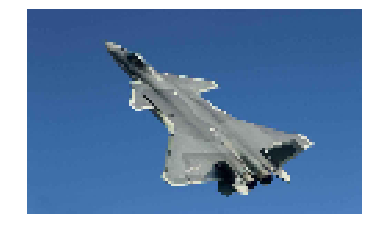

In [14]:
#指定像素
image50 = cv2.resize(image_rgb,(121, 74))
plt.imshow(image50), plt.axis("off")
plt.show()

图像的预处理经常需要调整大小，很多机器学习的算法不支持大图片，虽然大图片清晰，但是其学习结果会导致特征值无比的多，于是算出来的模型也会无比的巨大。调整图片大小当然不能用QQ影像一个一个点啦，resize函数接收2个参数，分别为待处理的图片和需要压缩成的像素大小，比如上图就是121*74像素。

# 四、裁剪图片

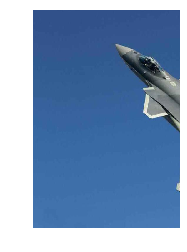

In [15]:
#裁剪
imageCrop = image_rgb[:,:500]
plt.imshow(imageCrop), plt.axis("off")
plt.show()

对图片的裁剪相当于对二维数组的切片，输入行和列进行索引选择即可，有关数组、矩阵和向量的运算是机器学习的基础

# 五、平滑处理图片

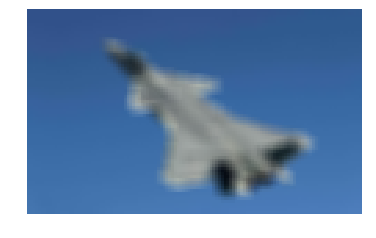

In [16]:
#平滑处理图像
imageBlurry  = cv2.blur(image50,(5,5))
plt.imshow(imageBlurry), plt.axis("off")
plt.show()

有些图片因为像素过低，导致模糊不清，对其进行平滑处理也是个不错的选择。平滑处理图像就是将图片上每个像素的值转换为其相邻的元素的均值。这里(5,5)表示每个像素取均值的相邻范围，越小越清晰。

如果将其替换为(50,50)，均值过大就会变为这样：

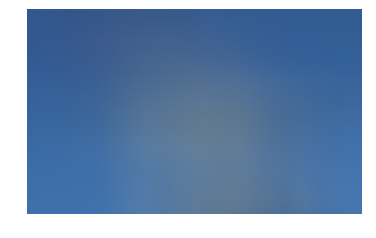

In [17]:
imageHiBlurry  = cv2.blur(image50,(50,50))
plt.imshow(imageHiBlurry), plt.axis("off")
plt.show()

# 六、锐化处理图片

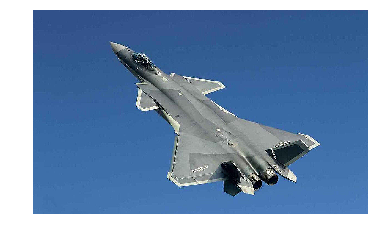

In [18]:
#图像锐化
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])
imageSharp = cv2.filter2D(image_rgb, -1, kernel)
plt.imshow(imageSharp), plt.axis("off")
plt.show()

设定核矩阵，运用filter2D函数达到锐化效果。

锐化与平滑原理相似，平滑使用平均处理相邻像素的值，而锐化则使用能凸显图像边缘的算法，使颜色变动大的地方差异变得更大。

# 七、提升图片对比度

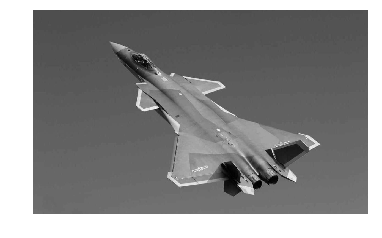

In [19]:
#提升对比度
#对于灰度图像，可以直接应用equalizeHist
imageGray = cv2.imread("001.jpg", cv2.IMREAD_GRAYSCALE)
#imageEnhance = cv2.equalizeHist(imageGray)
plt.imshow(imageGray, cmap="gray"), plt.axis("off")
plt.show()

对于灰度图像可以直接应用equalizeHist函数。

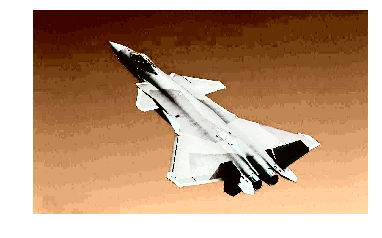

In [20]:
#对于彩色图像进行增强操作，需要转换为YUV格式
imageYuv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2YUV)
#对图像应用直方图均衡
imageYuv[:,:,0] = cv2.equalizeHist(imageYuv[:,:,0])
#转换为RGB格式
imageColEnhance = cv2.cvtColor(imageYuv, cv2.COLOR_YUV2RGB)
plt.imshow(imageColEnhance), plt.axis("off")
plt.show()

对于彩色图像，需要转换为YUV格式，对图像应用直方图均衡，然后再转换为RGB格式，哈哈，看起来颜色不太对，我们再调换一下红、蓝通道：

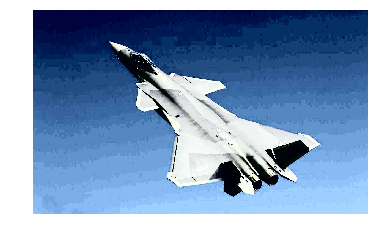

In [21]:
imageColEnhance_rgb = cv2.cvtColor(imageColEnhance, cv2.COLOR_BGR2RGB)
plt.imshow(imageColEnhance_rgb), plt.axis("off")
plt.show()

# 八、分离颜色

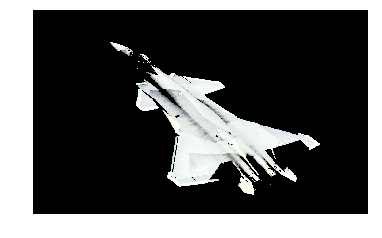

In [22]:
#颜色分离
#将RGB格式转为HSV格式 H、S、V分别代表色调、饱和度、亮度
imageHsv = cv2.cvtColor(imageColEnhance, cv2.COLOR_BGR2HSV)
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([255,40,255])
mask = cv2.inRange(imageHsv, lower_blue, upper_blue)
imageRgbMasked = cv2.bitwise_and(imageColEnhance, imageColEnhance, mask = mask)
imageRgb = cv2.cvtColor(imageRgbMasked, cv2.COLOR_BGR2RGB)
plt.imshow(imageRgb), plt.axis("off")
plt.show()

将图片中的某种颜色分离出来，由于歼20本身是白色，分离之后看起来就变成了灰度图片。可以尝试对参数进行调整，主要是lower_blue和upper_blue，其3个参数分别为H、S、V，代表色调、饱和度、亮度的区间。

# 九、图像黑白化

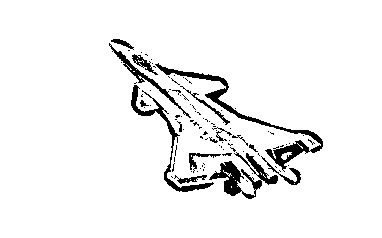

In [23]:
#图像黑白化
#按照阈值，将强度大于阈值的像素设置为白色，小于则为黑色
#更先进的办法是自适应阈值，算法中每个像素的阈值由相邻像素的强度决定。
maxOutputValue = 255
neighborhoodSize = 99
subtractFromMean = 10
imageBinarized = cv2.adaptiveThreshold(image,
                                       maxOutputValue,
                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY,
                                      neighborhoodSize,
                                      subtractFromMean)
plt.imshow(imageBinarized, cmap="gray"), plt.axis("off")
plt.show()

把图片简化为黑和白两个值，这种方法可以有效简化光照、色泽不同的相同物体的识别。每个像素的黑白颜色取决于其相邻元素的强度。adaptiveThreshold函数中，maxOutPutValue是像素值输出的最大强度，neighborhoodSize是相邻元素的范围，cv2.ADAPTIVE_THRESH_GAUSSIAN_C是像素的阈值，设定为相邻像素强度的加权和，subtractFromMean是调节阈值的常数，可以手工调节看看效果。

# 十、边缘输出

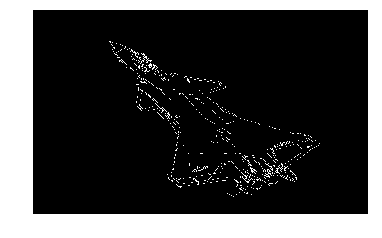

In [24]:
#边缘检测
medianIntensity = np.median(image)
lowerThreshold = int(max(0,(1.0 - 0.33) * medianIntensity))
upperThreshold = int(min(255,(1.0 + 0.33) * medianIntensity))
imageCanny = cv2.Canny(image, lowerThreshold,upperThreshold)
plt.imshow(imageCanny, cmap="gray"), plt.axis("off")
plt.show()

Canny函数用于输出图像中物体的边缘，除了待处理图片外，需要传入2个参数，分别为高低阈值，处于两个阈值间的值被函数认为是弱相关边缘，高于高阈值被认为是强相关边缘。一般来说，为了能够准确获取边缘信息，可先采用一小部分图片试错，对阈值进行调整即可。

# 十一、角点输出

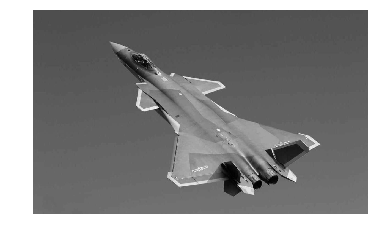

In [25]:
#角点检测
#以灰度图模式加载图像
imageGray = np.float32(image)
#设置参数
blockSize = 2
aperture = 29
freeParameter = 60
#检测角点
detectorResponses = cv2.cornerHarris(imageGray, 
                                     blockSize,
                                     aperture,
                                     freeParameter)
detectorResponses = cv2.dilate(detectorResponses, None)
threshold = 0.02
image_col[detectorResponses >
         threshold * 
         detectorResponses.max()]=[255, 255, 255]

image_gray = cv2.cvtColor(image_col, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray'), plt.axis("off")
plt.show()

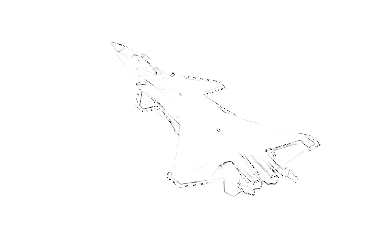

In [26]:
plt.imshow(detectorResponses, cmap='gray'), plt.axis("off")
plt.show()

cornerHarris函数用于检测角点，角点是两条边缘线条中的交叉点。blockSize是检测窗口的大小，aperture是算法中算子的大小，freeParameter是角点检测的严格程度，值越大，能够识别的角点范围越广，角点越平滑。